In [2]:
import numpy as np
import time
import sys
import math
#sys.path
#sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
#sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
#sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile


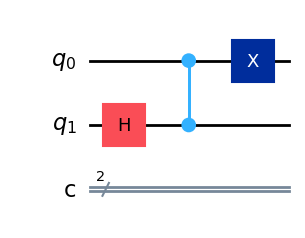

In [44]:
qc = QuantumCircuit(2,2)



qc.h(1)
#qc.measure(3,3)
qc.cz(0,1)
qc.x(0)
#qc.x(0)
#qc.x(1)
#qc.cz(0,1)

#qc.measure(0,0)
#qc.measure(1,1)


#qc.measure(2,2)

qc.draw('mpl')

In [45]:
from qiskit import quantum_info
psi = quantum_info.Statevector(qc)
print(psi)

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


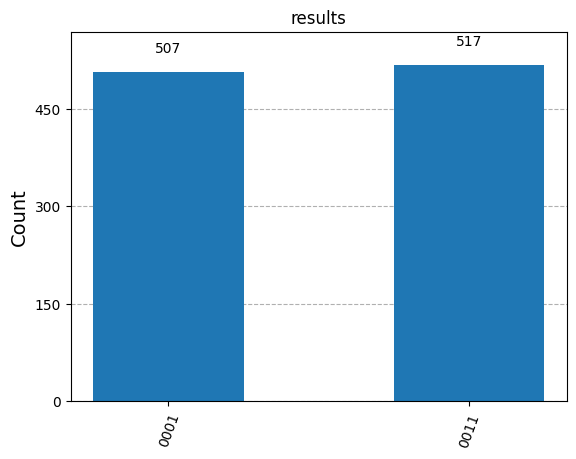

In [25]:
from qiskit.providers.basic_provider import BasicSimulator
simulator_object = BasicSimulator()
qc = qiskit.transpile(qc, simulator_object)
#QFT.draw('mpl')
job = simulator_object.run(qc, shots = 1024)
results = job.result()
counts = results.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

In [22]:
counts

{'0001': 1024}

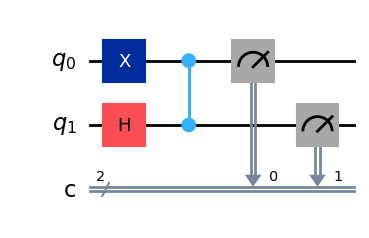

In [17]:
#new_string = qasm_str.replace('q[0]','q[3]')
#print(new_string)
list_1 = [0, 3]
q_num_fin = 2
q_num_init = 4
def remove_q(qc, q_num_init, q_num_fin, list_1):
    from qiskit.qasm2 import dumps
    qasm_str = dumps(qc)
    #print(qasm_str)

    for i in range(q_num_fin):
        str_in = 'q[' + str(list_1[i]) + ']'
        str_out = 'q[' + str(i) + ']'
        qasm_str = qasm_str.replace(str_in,str_out)
    
    str_in = 'qreg q[' + str(q_num_init) + ']'
    str_out = 'qreg q[' + str(q_num_fin) + ']'
    qasm_str = qasm_str.replace(str_in,str_out)
    str_in = 'creg c[' + str(q_num_init) + ']'
    str_out = 'creg c[' + str(q_num_fin) + ']'
    qasm_str = qasm_str.replace(str_in,str_out)
    
    str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
    index = qasm_str.find('qreg q[' + str(q_num_fin) + ']')
    qasm_str = qasm_str[:index] + str_sx + qasm_str[index:]
    
    #print(qasm_str)
    qc_2 = qiskit.qasm2.loads(qasm_str)
    return qc_2
qq =   remove_q(qc, q_num_init, q_num_fin, list_1)
qq.draw('mpl')

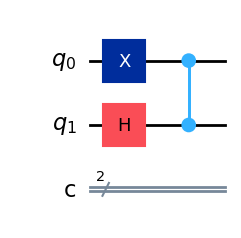

In [18]:
q2 = qiskit.qasm2.loads(qasm_str)
q2.draw('mpl')

In [72]:
from qiskit import quantum_info
psi = quantum_info.Statevector(qc)
print(psi)

Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


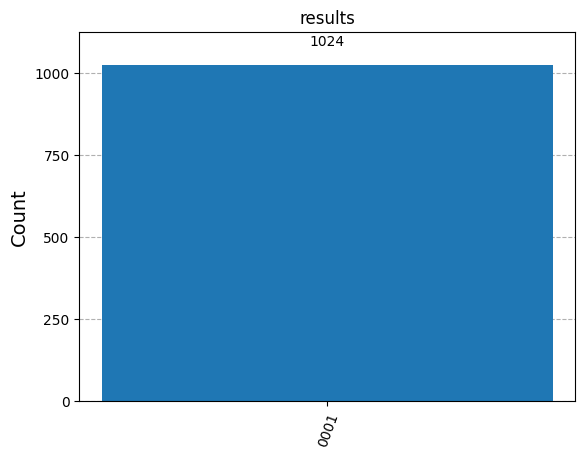

In [19]:
from qiskit.providers.basic_provider import BasicSimulator
simulator_object = BasicSimulator()
qc = qiskit.transpile(qc, simulator_object)
#QFT.draw('mpl')
job = simulator_object.run(qc, shots = 1024)
results = job.result()
counts = results.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

In [20]:
counts

{'0001': 1024}

In [22]:
#new_string = qasm_str.replace('q[0]','q[3]')
#print(new_string)
#q2 = qiskit.qasm2.loads(new_string)
#q2.draw('mpl')

In [21]:
#from qiskit.qasm2 import dumps
#qasm_str = dumps(qc)
#print(qasm_str)

In [24]:
counts

{'0101': 1024}

In [30]:
import bluequbit
from qiskit.visualization import plot_histogram
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
#qiskit_circuit, device='gpu'
result = bq.run(qc,device='gpu', shots = 100)
counts = result.get_counts()
plot_histogram(counts, title = 'results')

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.


BQJobNotCompleteError: Job wIHFJLsdvlbOEwF1 finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.